C:\Users\girim\OneDrive\Desktop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset=pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv') 
dataset.head(10)

Mounted at /content/drive


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# dataset=pd.read_csv(r'C:\Users\girim\OneDrive\Desktop\heart_2020_cleaned.csv') 
# dataset.head(10)




In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

We have total 18 columns in the dataset and the Target column is Heart Disease. 

In [5]:
dataset.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
dataset.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

From the above we came to know there is no Null value so we dont need to do imputation to fill Missing values.

In [7]:
dataset['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In the Above we see the Target column HeartDisease has 2 values  Yes and No But we have more No as compared to Yes. We can Infer that the dataset is unbalanced

In [8]:
dataset['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [9]:
dataset['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [10]:
dataset['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

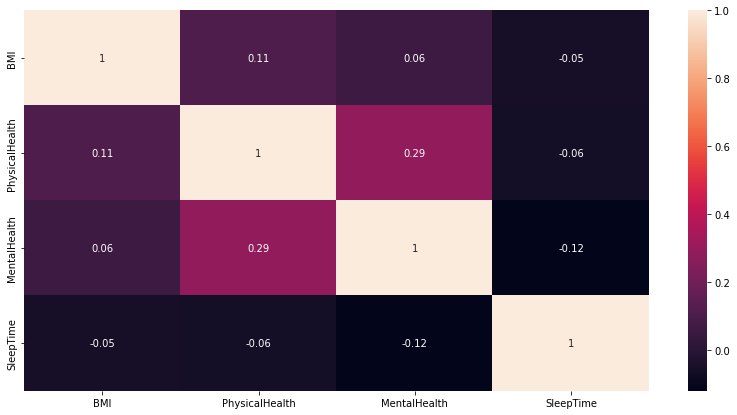

In [11]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

In [12]:
Bin_variables = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke","DiffWalking", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.str.upper())


In [13]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,NO,16.60,YES,NO,NO,3.0,30.0,NO,Female,55-59,White,Yes,YES,Very good,5.0,YES,NO,YES
1,NO,20.34,NO,NO,YES,0.0,0.0,NO,Female,80 or older,White,No,YES,Very good,7.0,NO,NO,NO
2,NO,26.58,YES,NO,NO,20.0,30.0,NO,Male,65-69,White,Yes,YES,Fair,8.0,YES,NO,NO
3,NO,24.21,NO,NO,NO,0.0,0.0,NO,Female,75-79,White,No,NO,Good,6.0,NO,NO,YES
4,NO,23.71,NO,NO,NO,28.0,0.0,YES,Female,40-44,White,No,YES,Very good,8.0,NO,NO,NO


In [14]:
dataset[Bin_variables] = dataset[Bin_variables].apply(lambda x: x.map({'YES':1,'NO':0}))

In [15]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [16]:
dataset['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [17]:
dataset.replace(('Male','Female'),(1,0),inplace=True)
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [18]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Diabetic']= label_encoder.fit_transform(dataset['Diabetic'])
dataset['AgeCategory']= label_encoder.fit_transform(dataset['AgeCategory'])
dataset['Race']= label_encoder.fit_transform(dataset['Race'])
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,Very good,8.0,0,0,0


In [19]:
dataset.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [20]:
d1=['GenHealth']
dataset[d1] = dataset[d1].apply(lambda x: x.map({'Very good':3,'Good':2,'Excellent':4,'Fair':1,'Poor':0}))
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,3,8.0,0,0,0


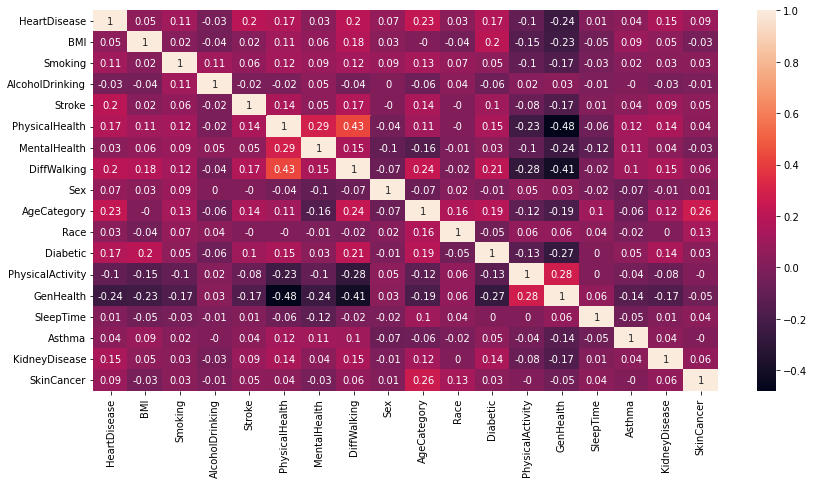

In [21]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

In [22]:
dataset['HeartDisease'].value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

In [23]:
X_1 = dataset.drop('HeartDisease', axis=1)
y_1 = dataset['HeartDisease']



In [24]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_1, y_1)

print(X_res)

              BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0       16.600000        1                0       0        3.000000   
1       20.340000        0                0       1        0.000000   
2       26.580000        1                0       0       20.000000   
3       24.210000        0                0       0        0.000000   
4       23.710000        0                0       0       28.000000   
...           ...      ...              ...     ...             ...   
584839  23.490579        0                0       0        0.000000   
584840  28.995898        0                0       0        0.000000   
584841  36.570562        0                0       0       20.000000   
584842  22.436345        0                0       0        0.000000   
584843  24.930216        1                0       0        0.141713   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0               30.0            0    0            7     5         2   
1    

In [25]:
print(Counter(y_res).items())
print(y_res.shape)

dict_items([(0, 292422), (1, 292422)])
(584844,)


In [26]:
dataset['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [27]:
dataset_1=dataset.copy()

In [28]:
X1 = dataset.drop('HeartDisease', axis=1)
y1 = dataset['HeartDisease']

As the dataset is imbalanaced we use random over sampler to balance the data set


In [29]:
# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X1, y1)

In [30]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=101)
X, y = sm.fit_resample(X1, y1)

In [31]:
target_new=pd.DataFrame(y)
print(target_new.value_counts())

HeartDisease
0               292422
1               292422
dtype: int64


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [34]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9641273496187035


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


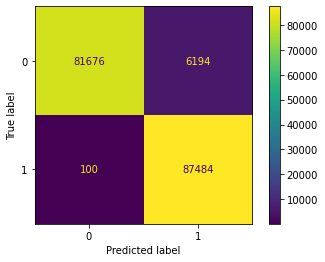

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     87870
           1       0.93      1.00      0.97     87584

    accuracy                           0.96    175454
   macro avg       0.97      0.96      0.96    175454
weighted avg       0.97      0.96      0.96    175454



In [37]:
# from sklearn.model_selection import GridSearchCV
 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','poly','linear']}
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# # fitting the model for grid search
# grid.fit(X_train, y_train)

In [38]:
# X2 = dataset_1.drop('HeartDisease', axis=1)
# y2 = dataset_1['HeartDisease']
# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X2, y2)

In [39]:
# X2 = dataset_1.drop('HeartDisease', axis=1)
# y2 = dataset_1['HeartDisease']
# sm = RandomOverSampler(random_state=101)
# X, y = sm.fit_resample(X2, y2)

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [41]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=10, random_state=0,bootstrap='False').fit(X_train, y_train)

In [42]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred)) 

[[78541  9329]
 [  205 87379]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     87870
           1       0.90      1.00      0.95     87584

    accuracy                           0.95    175454
   macro avg       0.95      0.95      0.95    175454
weighted avg       0.95      0.95      0.95    175454



In [44]:
# # print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [45]:
print(clf.n_features_in_)

17


In [46]:
from sklearn.model_selection import cross_val_score,KFold
logreg=BaggingClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.92409955 0.92821175 0.95345775 0.99789688 0.99776007]
Average Cross Validation score :0.9602851999419866
